# Challenge Probabilidade e Amostragem

## Bibliotecas gerais

In [ ]:
### para manipulação dos dados em python
import pandas as pd
import numpy as np
import math

### leitura dos dados csv
from google.colab import files

### para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

### para obter estatisticas de teste
import scipy.stats as stats
from scipy.stats import norm


# Desafio 1: Entendendo o consumidor.

In [ ]:
files.upload()
df_consumidor = pd.read_csv("desafio_1_consumidor.csv")
df_consumidor

Saving desafio_1_consumidor.csv to desafio_1_consumidor.csv


,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


## <b>1.</b> Entendendo a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia

*   a. Identifique as distribuições
*   b. Plote histogramas / boxplots

In [ ]:
# Separando os consumidores pré e pós pandemia
consumidor_pre_pandemia = df_consumidor.loc[df_consumidor['pre-pandemia'] == 1]
consumidor_pos_pandemia = df_consumidor.loc[df_consumidor['pre-pandemia'] == 0]

In [ ]:
# Identificando as principais medidas para variáveis numéricas

pos_idade = consumidor_pos_pandemia['idade'].describe()
pos_renda = consumidor_pos_pandemia['renda'].describe()

pre_idade = consumidor_pre_pandemia['idade'].describe()
pre_renda = consumidor_pre_pandemia['renda'].describe()

descricao = pd.DataFrame({
    'Medidas': pos_idade.index,
    'Pré-Pandemia Idade': pre_idade.values,
    'Pós-Pandemia Idade': pos_idade.values,
    'Pré-Pandemia Renda': pre_renda.values,
    'Pós-Pandemia Renda': pos_renda.values
})

descricao

,Medidas,Pré-Pandemia Idade,Pós-Pandemia Idade,Pré-Pandemia Renda,Pós-Pandemia Renda
0,count,101.000000,102.000000,101.000000,102.000000
1,mean,39.881188,44.901961,9180.643564,13968.500000
2,std,15.016183,13.373174,6007.677720,5641.384444
3,min,16.000000,15.000000,110.000000,1995.000000
4,25%,28.000000,35.250000,4867.000000,10255.000000
5,50%,37.000000,46.000000,7488.000000,13380.500000
6,75%,48.000000,54.750000,13226.000000,16870.250000
7,max,80.000000,77.000000,24090.000000,30000.000000


In [ ]:
df_consumidor.loc[df_consumidor['renda'] < 1995]

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
1,XXXXXXX15,59,837,desodorante,Nordeste,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
27,XXXXXXX84,27,110,batom,Nordeste,1
35,XXXXXXX37,54,298,batom,Sul,1
49,XXXXXXX78,26,251,desodorante,Centro-Oeste,1
63,XXXXXXX32,40,1314,batom,Nordeste,1
100,XXXXXXX29,48,1286,batom,Nordeste,1


<b>Consumidores antes da pandemia:</b>
* Consumidores entre 16 e 80 anos de idade com média de 39 anos
* Média das rendas: 9180 reais
* Renda mínima: 110 reais

<hr>

<b>Consumidores depois da pandemia:</b>
* Consumidores entre 15 e 77 anos de idade com média de 44 anos
* Média das rendas: 13968 reais
* Renda mínima: 1995 reais

<hr>

<b>Insights:</b>

1. Podemos perceber que depois da pandemia algumas pessoas com renda abaixo de 1900 (renda mínima no pós pandemia) pararam de consumir produtos de beleza. Isso pode ter ocorrido devido às grandes dificuldades financeiras que vieram com a crise.
A renda média subiu consideravelmente após a pandemia, de 9180.64 para 13968.50. A renda máxima também teve aumento, saindo de R$24090 para 30000.
Isso indica que apenas os consumidores com uma melhor condição financeira seguiram comprando, ao passo em que os consumidores de menor poder aquisitivo não tiveram participação no consumo.

2. A média de idade subiu no período pós pandemia, saindo de 39.88 para 44.90. A idade mínima teve pouca variação (16 anos no pré pandemia x 15 anos no período pós pandemia). A idade máxima caiu de 80 para 77 anos.

In [ ]:
# Comparação da categoria produto no pré e pós pandemia

comparacao_produto = pd.crosstab(df_consumidor['produto'], df_consumidor['pre-pandemia'])
comparacao_produto.columns = ['Pós-Pandemia', 'Pré-Pandemia']

comparacao_produto

,Pós-Pandemia,Pré-Pandemia
produto,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


In [ ]:
# Comparação da categoria região no pré e pós pandemia
comparacao_regiao = pd.crosstab(df_consumidor['regiao-BR'], df_consumidor['pre-pandemia'], margins=False)
comparacao_regiao.columns = ['Pós-Pandemia', 'Pré-Pandemia']

comparacao_regiao

,Pós-Pandemia,Pré-Pandemia
regiao-BR,,
Centro-Oeste,8,17
Nordeste,25,26
Norte,9,8
Sudeste,18,21
Sul,42,29


In [ ]:
# Criando uma tabela de vendas de produto por região, apenas para o período pós pandemia
tabela_produto_regiao = pd.crosstab(consumidor_pos_pandemia['produto'], consumidor_pos_pandemia['regiao-BR'])
tabela_produto_regiao

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
produto,,,,,
antissinais,8,3,9,0,0
base,0,4,0,0,0
batom,0,0,0,14,1
desodorante,0,1,0,4,41
perfume,0,8,0,0,0
sombra,0,9,0,0,0


<b>Insights: </b>
* A venda de antissinais está concentrada nas regiões Centro-Oeste e Norte;
* A venda de bases está acontecendo apenas no Nordeste;
* A venda de batons está concentrada principalmente na região Sudeste;
* Houve um boom na venda de desodorantes para a região Sul, produto mais vendido no cenário pós pandemia;
* Para os produtos Perfume e Base, a venda está acontecendo apenas no Nordeste.

Visualizações Gráficas

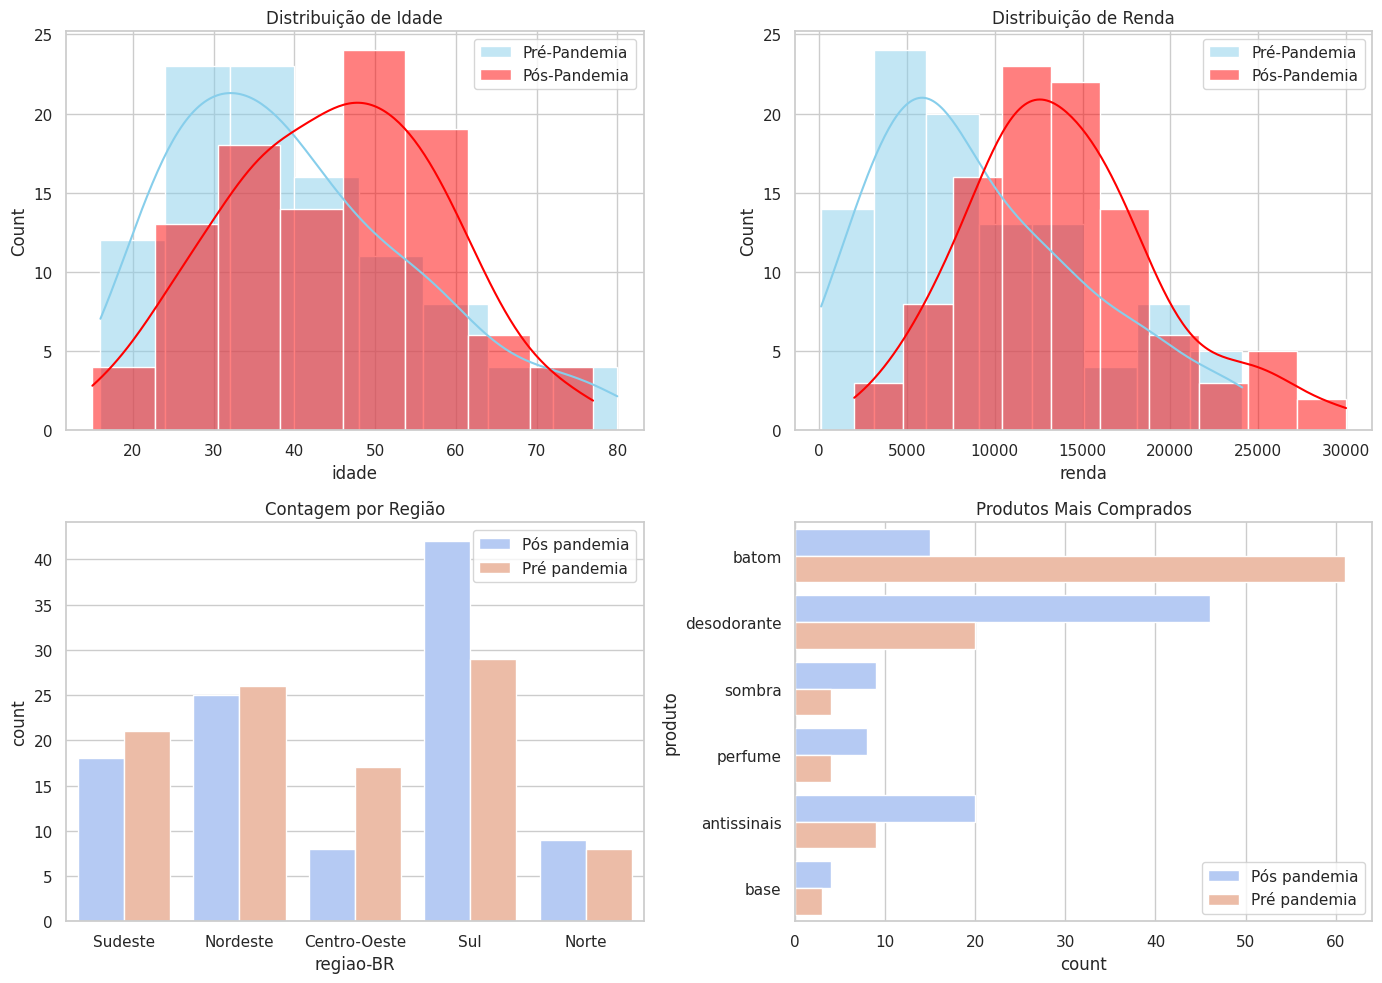

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando figuras para visualizações
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Distribuição de Idade antes e depois da pandemia
sns.histplot(df_consumidor[df_consumidor['pre-pandemia'] == 1]['idade'], kde=True, color='skyblue', ax=ax[0, 0], label='Pré-Pandemia')
sns.histplot(df_consumidor[df_consumidor['pre-pandemia'] == 0]['idade'], kde=True, color='red', ax=ax[0, 0], label='Pós-Pandemia')
ax[0, 0].set_title('Distribuição de Idade')
ax[0, 0].legend()

# Distribuição de Renda antes e depois da pandemia
sns.histplot(df_consumidor[df_consumidor['pre-pandemia'] == 1]['renda'], kde=True, color='skyblue', ax=ax[0, 1], label='Pré-Pandemia')
sns.histplot(df_consumidor[df_consumidor['pre-pandemia'] == 0]['renda'], kde=True, color='red', ax=ax[0, 1], label='Pós-Pandemia')
ax[0, 1].set_title('Distribuição de Renda')
ax[0, 1].legend()

# Contagem de regiões antes e depois da pandemia
sns.countplot(x='regiao-BR', hue='pre-pandemia', data=df_consumidor, palette='coolwarm', ax=ax[1, 0])
ax[1, 0].set_title('Contagem por Região')
ax[1, 0].legend(labels=['Pós pandemia', 'Pré pandemia'])

# Contagem de produtos mais comprados antes e depois da pandemia
sns.countplot(y='produto', hue='pre-pandemia', data=df_consumidor, palette='coolwarm', ax=ax[1, 1])
ax[1, 1].set_title('Produtos Mais Comprados')
ax[1, 1].legend(labels=['Pós pandemia', 'Pré pandemia'])

plt.tight_layout()
plt.show()

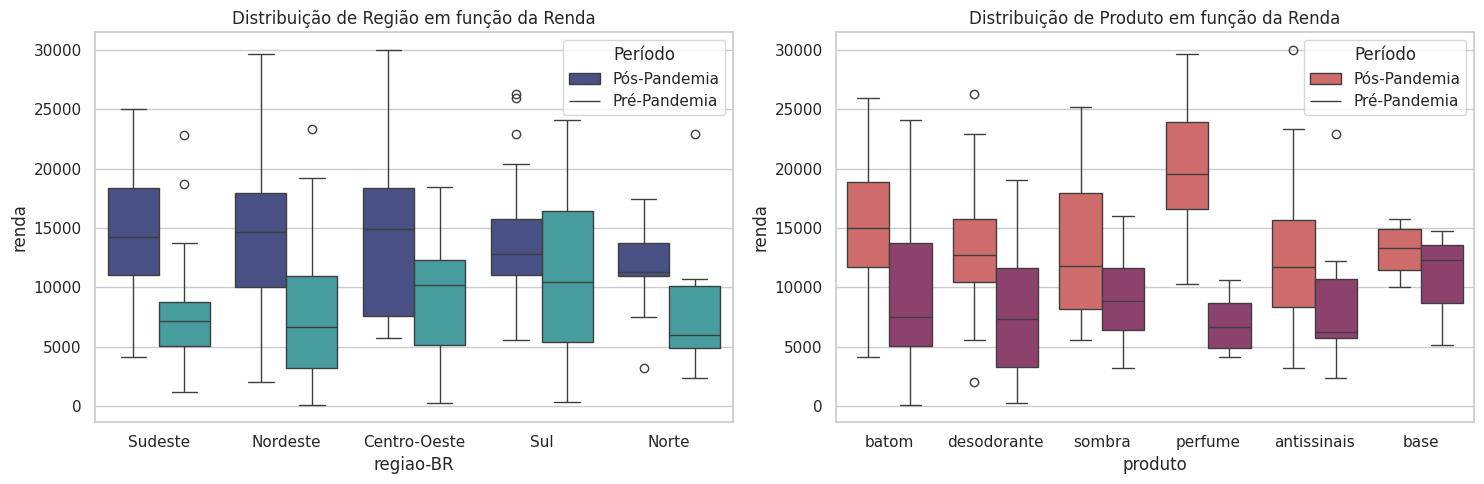

In [ ]:
# Boxplots

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando figuras para visualizações
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Renda por Região
sns.boxplot(x='regiao-BR', y='renda', hue='pre-pandemia', data=df_consumidor, palette='mako', ax=ax[0])
ax[0].legend(title='Período', labels=['Pós-Pandemia', 'Pré-Pandemia'])
ax[0].set_title('Distribuição de Região em função da Renda')


# Boxplot: Renda por Produto
sns.boxplot(x='produto', y='renda', hue='pre-pandemia', data=df_consumidor, palette='flare', ax=ax[1])
ax[1].legend(title='Período', labels=['Pós-Pandemia', 'Pré-Pandemia'])
ax[1].set_title('Distribuição de Produto em função da Renda')


plt.tight_layout()
plt.show()

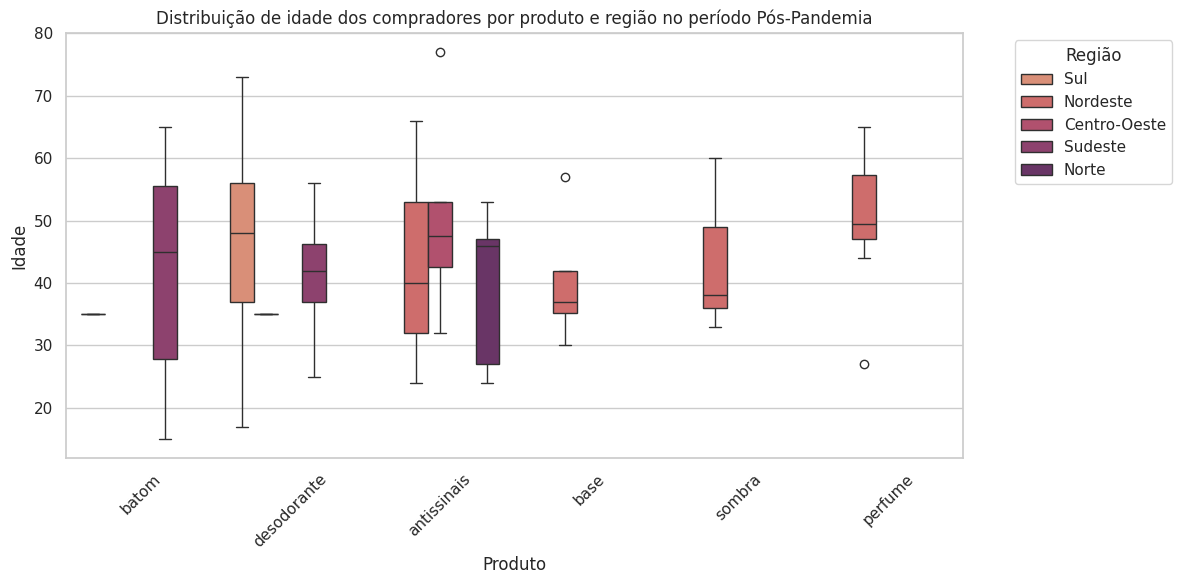

In [ ]:
# Plotando boxplot de produtos por região em função da idade
plt.figure(figsize=(12, 6))
sns.boxplot(x='produto', y='idade', hue='regiao-BR', data=consumidor_pos_pandemia, palette='flare')
plt.title('Distribuição de idade dos compradores por produto e região no período Pós-Pandemia')
plt.xlabel('Produto')
plt.ylabel('Idade')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajusta a legenda para fora do gráfico
plt.tight_layout()
plt.show()

<b>Insights:</b>

* No histograma "Idade pré e pós pandemia", podemos observar que com a pós-pandemia as idades começaram levemente a se aproximar de uma <b>distribuição normal</b>, com picos entre 40 a 65 anos que não existiam antes, enquanto na pré pandemia temos uma distribuição assimétrica com concentração a esquerda, indicando grande presença do público mais jovem, com picos nas faixas dos 20 a 35 anos.
* Notamos diminuição de consumidores das regiões Sudeste, Centro-Oeste e Nordeste, com aumento considerável na região Sul. A região Norte se manteve estável.
* Apesar disso, as regiões Sul e Nordeste se mantêm como as maiores consumidoras nos dois cenários.
* No pós-pandemia há um aumento considerável na compra de antisinais, trazendo um perfil de consumidores que busca mais o cuidado com a pele feito antes da maquiagem.
* Na pós pandemia também ocorreu grande diminuição da venda de batons. Isso pode ter ocorrido devido ao uso das máscaras. Contudo, com o encerramento do lockdown a compra de desodorantes obteve um salto de vendas, assim como outros produtos possíveis de usar com a máscara  - como sombra, perfume, base e antissinais.
* No boxplot "Renda x região", podemos confirmar que após a pandemia pessoas com rendas menores pararam de consumir principalmente nas regiões Sudeste, Nordeste e Norte. Isso pode ser pelo fato das grandes dificuldades financeiras que vieram com a crise.
* No boxplot "Distribuição de idade dos compradores por produto e região no período Pós-Pandemia", podemos observar o perfil de consumidores por tipo de produto, em função da idade e região. Com isso, é possível definir padrões de consumo e desenvolver campanhas nichadas.

## **2.** Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas? (pergunta extra)

In [ ]:
# Comparação da categoria produto no pré e pós pandemia

comparacao_produto['Variação Percentual(%)'] = (((comparacao_produto['Pós-Pandemia'] - comparacao_produto['Pré-Pandemia']) / comparacao_produto['Pré-Pandemia']) * 100).round(2)
comparacao_produto

,Pós-Pandemia,Pré-Pandemia,Variação Percentual(%)
produto,,,
antissinais,20,9,122.22
base,4,3,33.33
batom,15,61,-75.41
desodorante,46,20,130.00
perfume,8,4,100.00
sombra,9,4,125.00


<b>Insights:</b>

* A maioria dos produtos teve aumento de venda no pós pandemia.
O único produto que apresentou queda foi o batom, com uma redução de 75.41%.

In [ ]:
# Comparação de região no pré e pós pandemia

comparacao_regiao['Variação Percentual (%)'] = (((comparacao_regiao['Pós-Pandemia'] - comparacao_regiao['Pré-Pandemia']) / comparacao_regiao['Pré-Pandemia']) * 100).round(2)
comparacao_regiao

,Pós-Pandemia,Pré-Pandemia,Variação Percentual (%)
regiao-BR,,,
Centro-Oeste,8,17,-52.94
Nordeste,25,26,-3.85
Norte,9,8,12.50
Sudeste,18,21,-14.29
Sul,42,29,44.83


<b>Insights: </b>

A maioria das regiões apresentou redução no número de consumidores, sendo:
- Queda de 52.94% no Centro-Oeste
- Queda de 3.85% no Nordeste
- Queda de 14.29% no Sudeste

No Norte e Sul houve aumento do número de consumidores, com 12.50% no Norte e um aumento mais agressivo no Sul, com 44.83%.

**Provando estatísticamente com teste de hipótese o aumento de média das idades (anteriormente na visualização gráfica identificamos novos picos de entre 40 e 50 anos no pós-pandemia):**

In [ ]:
print("Hipótese nula: A média de idade do consumidor é {}".format(consumidor_pre_pandemia['idade'].mean()))
print("Hipótese alternativa: A nova média de idade do consumidor é {}".format(consumidor_pos_pandemia['idade'].mean()))

Hipótese nula: A média de idade do consumidor é 39.881188118811885
Hipótese alternativa: A nova média de idade do consumidor é 44.90196078431372


In [ ]:
# Media, desvio padrão e nível de significância (alfa)
media_amostral = consumidor_pos_pandemia['idade'].mean()
dp = consumidor_pos_pandemia['idade'].std()
alfa = 0.05

print(f"Média hipótese alternativa: {media_amostral}\nDesvio Padrão Alternativo:{dp}")

media_h0 = consumidor_pre_pandemia['idade'].mean()
print("Média hipótese nula",media_h0)

Média hipótese alternativa: 44.90196078431372
Desvio Padrão Alternativo:13.37317383030209
Média hipótese nula 39.881188118811885


In [ ]:
# Padronizando os dados com estatística de teste para a média
raiz_n = math.sqrt(len(consumidor_pos_pandemia['id_cliente']))
z = (media_amostral - media_h0)/(dp/raiz_n)
print(f"O valor de Z é: {z}. Com base na tabela Z corresponde à: 0.9999")

valor_p = (1 - 0.9999) # Subtraímos 1 pois a Hipótese alternativa é maior que
valor_p = 0.0001
print(f"Encontrado valor-p de: {valor_p}")

O valor de Z é: 3.791719076793284. Com base na tabela Z corresponde à: 0.9999
Encontrado valor-p de: 0.0001


<b>RESULTADO:</b>

Comparando o p-value encontrado com o nosso alfa temos que <b>p-value < alfa</b>. <br>

Sendo assim, é possível rejeitar a Hípotese nula de média das idade 39. Comprovamos estatisticamente que ocorreu a mudança da média das idades para 44 anos, indicando a presença do público mais velho.

**FÓRMULA UTILIZADA:**

n = (z** . p . (1 - p)) / e**

In [ ]:
n = 100000
z = 1.96
e = 0.02
p = 0.50

tamanho_ideal = z**2*p*(1-p)/e**2
print("O tamanho de amostra ideal com 95% de confiança e 2% de margem de erro é: {} dados".format(round(tamanho_ideal)))

O tamanho de amostra ideal com 95% de confiança e 2% de margem de erro é: 2401 dados


Quanto maior nossa margem de erro, estaremos aceitando amostra menores que trarão grande variabilidade dos dados, com essa variabilidade nosso intervalo de confiança estará em intervalos maiores por conta da margem de erro maior. Seguimos o racíociono inverso para uma margem de erro menor.

### Considerações finais
* Houve uma mudança significativa no perfil demográfico dos consumidores, com um aumento na idade média e uma diminuição na dispersão etária. Esta mudança pode indicar uma maior conscientização sobre cuidados com a pele e corpo, considerando o aumento das vendas de produtos antissinais e o declínio na compra de batons - provavelmente devido ao uso das máscaras.

* Também foi percebido um crescimento notável na renda média e máxima dos consumidores após a pandemia, o que sugere um aumento geral no poder de compra. No entanto, é importante notar que houve uma redução no número de consumidores em algumas regiões, possivelmente devido a dificuldades financeiras enfrentadas durante a crise.

* As análises regionais revelaram padrões interessantes de comportamento de compra, com diferentes produtos apresentando desempenhos variados em cada região. Estratégias de marketing podem ser adaptadas para cada área geográfica, utilizando como indicadores as preferências e tendências locais.

* Por fim, a queda significativa no número de consumidores de algumas regiões destaca a importância de ajustar as estratégias de mercado para enfrentar desafios demográficos específicos.